Import the Python modules needed for the solution.

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

Define Particle Class
Each particle has a position (a permutation of cities), velocity, best position visited, and the corresponding cost (total distance).

In [2]:
class Particle:
    def __init__(self, numberOfCities):
        self.position = np.random.permutation(numberOfCities)
        self.velocity = np.random.permutation(numberOfCities)
        self.bestPosition = self.position.copy()
        self.bestCost = float('inf')

Distance calculating function

In [3]:
def calculateDistance(city1, city2):
    x1, y1 = city1
    x2, y2 = city2
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

def calculateTotalDistance(tour, cities):
    totalDistance = 0
    numberOfCities = len(tour)

    for i in range(numberOfCities - 1):
        totalDistance += calculateDistance(cities[tour[i]], cities[tour[i+1]])

    totalDistance += calculateDistance(cities[tour[-1]], cities[tour[0]])  # Return to the starting city
    return totalDistance

Initializes a list of particles with random positions and velocities.

In [4]:
def initializeParticles(numberOfParticles, numberOfCities):
    particles = [Particle(numberOfCities) for _ in range(numberOfParticles)]
    return particles

Updates the particle's velocity based on its current velocity, best position, and the global best position.

In [5]:
def updateVelocity(particle, globalBestPosition, inertiaWeight, c1, c2):
    r1, r2 = random.random(), random.random()
    inertiaTerm = inertiaWeight * particle.velocity
    cognitiveTerm = c1 * r1 * (particle.bestPosition - particle.position)
    socialTerm = c2 * r2 * (globalBestPosition - particle.position)
    newVelocity = inertiaTerm + cognitiveTerm + socialTerm
    return newVelocity

 Updates the particle's position based on its current position.

In [6]:
def updatePosition(particle, numberOfCities):
    # Ensure the position is a valid permutation
    newPosition = np.argsort(particle.position)
    return newPosition

Implements the main PSO algorithm. Initializes particles, updates their positions and velocities, and tracks the global best solution.

In [7]:
def pso(cities, numberOfParticles, numberOfIterations, inertiaWeight, c1, c2):
    numberOfCities = len(cities)
    particles = initializeParticles(numberOfParticles, numberOfCities)

    globalBestParticle = min(particles, key=lambda x: x.bestCost)

    for iteration in range(numberOfIterations):
        for particle in particles:
            currentCost = calculateTotalDistance(particle.position, cities)
            if currentCost < particle.bestCost:
                particle.bestCost = currentCost
                particle.bestPosition = particle.position.copy()

            if currentCost < globalBestParticle.bestCost:
                globalBestParticle.bestCost = currentCost
                globalBestParticle.bestPosition = particle.position.copy()

        for particle in particles:
            particle.velocity = updateVelocity(particle, globalBestParticle.bestPosition, inertiaWeight, c1, c2)
            particle.position = updatePosition(particle, numberOfCities)

    path = globalBestParticle.bestPosition
    cost = globalBestParticle.bestCost
    return path, cost

Plot Method for visualization

In [8]:
def plot(points, path: list):
    x = []
    y = []
    for point in points:
        x.append(point[0])
        y.append(point[1])
    plt.plot(x, y, 'co')
    for i in range (0, len(path)):
        plt.annotate(i, (x[i], y[i]))
    for _ in range(1, len(path)):
        i = path[_ - 1]
        j = path[_]
        plt.arrow(x[i], y[i], x[j] - x[i], y[j] - y[i], color='r', length_includes_head=True)

    plt.show()

[(1304, 2312), (3639, 1315), (4177, 2244), (3712, 1399), (3488, 1535), (3326, 1556), (3238, 1229), (4196, 1004), (4312, 790), (4386, 570), (3007, 1970), (2562, 1756), (2788, 1491), (2381, 1676), (1332, 695), (3715, 1678), (3918, 2179), (4061, 2370), (3780, 2212), (3676, 2578), (4029, 2838), (4263, 2931), (3429, 1908), (3507, 2367), (3394, 2643), (3439, 3201), (2935, 3240), (3140, 3550), (2545, 2357), (2778, 2826), (2370, 2975)]
Path: [10 20 16  4  6 21  7  8  5 17 15  1  3 23 25 14 29 22 26 12  2  9 19 18
 24 27 30  0 28 11 13]
Cost: 35161.66979874626


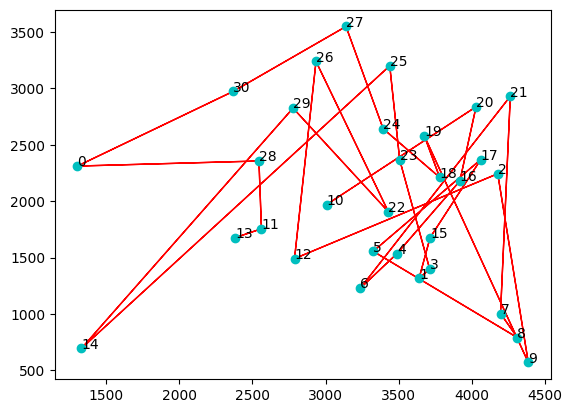

In [10]:
if __name__ == "__main__":
    # Read cities from file
    with open('./chn31.txt', 'r') as file:
        cities = [list(map(int, line.split()[1:])) for line in file]

    points=[]
    points = [((int(city[0]), int(city[1]))) for city in cities]

    print(points)

    numberOfParticles = 100
    numberOfIterations = 100  # Increased iterations for better exploration
    inertiaWeight = 0.4  # Increased inertia weight for more exploration
    c1 = 0.9
    c2 = 0.7

    path, cost = pso(cities, numberOfParticles, numberOfIterations, inertiaWeight, c1, c2)

    print("Path:", path)
    print("Cost:", cost)
    plot(points, path)
